# NBA Presentation  
Claire Zhou

In [1]:
import numpy as np
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt

# Seaborn for plotting and styling
import seaborn as sns

In [2]:
# Download the data via pandas 
data = pd.DataFrame(pd.read_excel("~/Downloads/NBA_Stats_71_Years.xlsx"))
data.head()

,Rank,Year,Season Start Year,Season Type,Player ID,Player,Team ID,Team,Games Played,Minutes Played,...,Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points Scored,Efficency,AST/TOV,STL/TOV
0,1,1951-52,1951,Regular Season,76056,Paul Arizin,1610612744,PHW,66,2939,...,745,170,NaN,NaN,NaN,250,1674,1786,NaN,NaN
1,2,1951-52,1951,Regular Season,600012,George Mikan,1610612747,MNL,64,2572,...,866,194,NaN,NaN,NaN,286,1523,1592,NaN,NaN
2,3,1951-52,1951,Regular Season,600003,Bob Cousy,1610612738,BOS,66,2681,...,421,441,NaN,NaN,NaN,190,1433,1322,NaN,NaN
3,4,1951-52,1951,Regular Season,77429,Ed Macauley,1610612738,BOS,66,2631,...,529,232,NaN,NaN,NaN,174,1264,1396,NaN,NaN
4,5,1951-52,1951,Regular Season,76514,Bob Davies,1610612758,ROC,65,2394,...,189,390,NaN,NaN,NaN,269,1052,935,NaN,NaN


We restrict analysis to statistics in only regular season, to study performance of ALL players.

In [147]:
data_reg=data[data["Season Type"]=="Regular Season"].copy()

In [148]:
data_reg["Decade"]=np.floor(data_reg["Season Start Year"]/10)*10
data_reg["Decade"]=data_reg["Decade"].astype("int")

In [149]:
len(data_reg["Player ID"].unique())

4422

In [150]:
len(data_reg)/len(data_reg["Player ID"].unique()) 

5.163274536408864

On Average a player spends 5.16 years in the league. 

From the data alone, we do not know the age of each player during a particular season. Players' tenure in the league may also have gaps, i.e. they left the league at certain point then came back later after a few seasons. 


We create a column called "Year in League" that calulcates the years a player has been in the league during the season. For example: Year in League=1 means that the player was a rookie during the season. 

In [151]:
data_reg["Year in League"] = data_reg.groupby("Player ID")["Season Start Year"].rank()
data_reg["Year in League"]=data_reg["Year in League"].astype("int")

In [267]:
summarize_by_player=data_reg.groupby(["Player","Player ID"]).agg(
    {"Year in League":"max", "Season Start Year":"min"})

In [268]:
summarize_by_player=summarize_by_player.reset_index()

In [269]:
summarize_by_player

,Player,Player ID,Year in League,Season Start Year
0,A.C. Green,920,16,1985
1,A.J. Bramlett,1920,1,1999
2,A.J. English,76672,2,1990
3,A.J. Guyton,2062,3,2000
4,A.J. Lawson,1630639,1,2022
...,...,...,...,...
4417,Zion Williamson,1629627,3,2019
4418,Zoran Dragic,204054,1,2014
4419,Zoran Planinic,2565,3,2003
4420,Zydrunas Ilgauskas,980,13,1997


In [270]:
summarize_by_player=summarize_by_player.rename(
    {"Year in League":"max_year", "Season Start Year":"start_year"},axis="columns")

In [271]:
summarize_by_player["max_year"]=summarize_by_player["max_year"].astype("int")

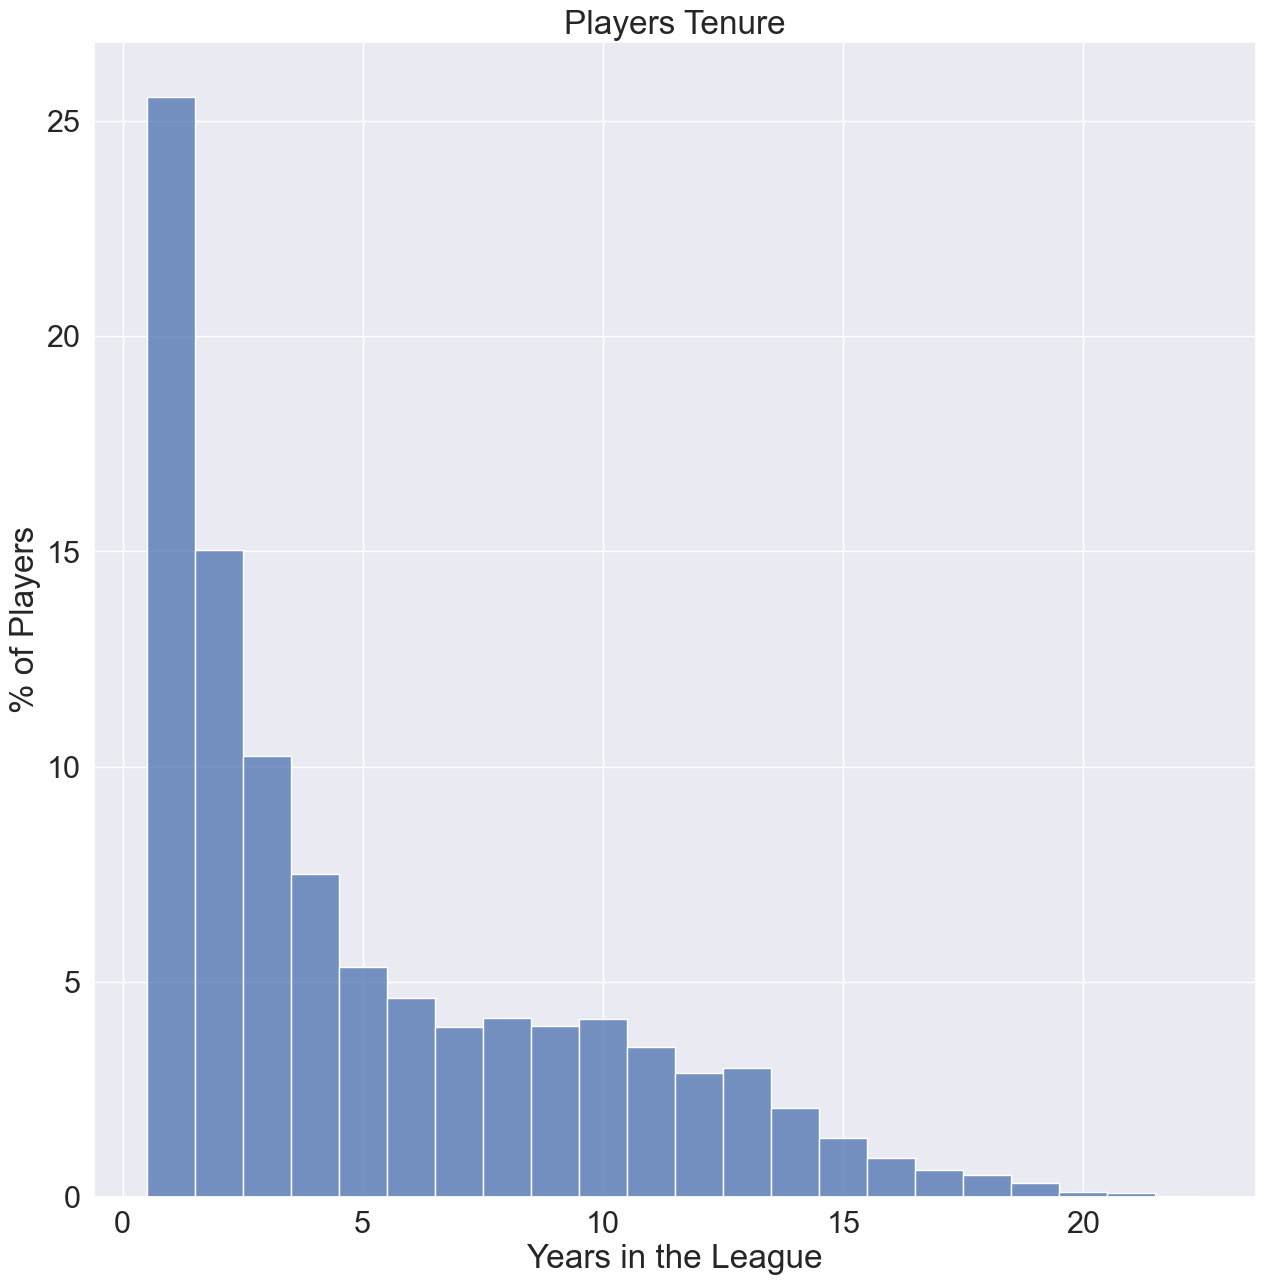

In [272]:
plt.figure(figsize=(15,15))
ax = sns.histplot(data=summarize_by_player,x="max_year",discrete=True, stat="percent")
#specfiy axis labels
ax.set(xlabel='Years in the League',
       ylabel='% of Players',
       title='Player''s Tenure')

sns.set(font_scale=5)

Over 25\% of the players spent only 1 year in NBA. 

(Who has spent the most seasons in the league?) Vince Carter spent 22 years in the league. ..... 

In [273]:
summarize_by_player["max_year"].median()

3.0

In [274]:
summarize_by_player.sort_values("max_year", ascending=False)[:15]

,Player,Player ID,max_year,start_year
4243,Vince Carter,1713,22,1998
1183,Dirk Nowitzki,1717,21,1998
2582,Kevin Willis,788,21,1984
3583,Robert Parish,305,21,1976
2553,Kevin Garnett,708,21,1995
2448,Kareem Abdul-Jabbar,76003,20,1969
1894,Jamal Crawford,2037,20,2000
2605,Kobe Bryant,977,20,1996
4220,Udonis Haslem,2617,20,2003
2706,LeBron James,2544,20,2003


In [156]:
average_year_by_decade=data_reg.groupby(["Decade"])["Year in League"].mean()

In [167]:
average_year_by_decade=average_year_by_decade.reset_index()

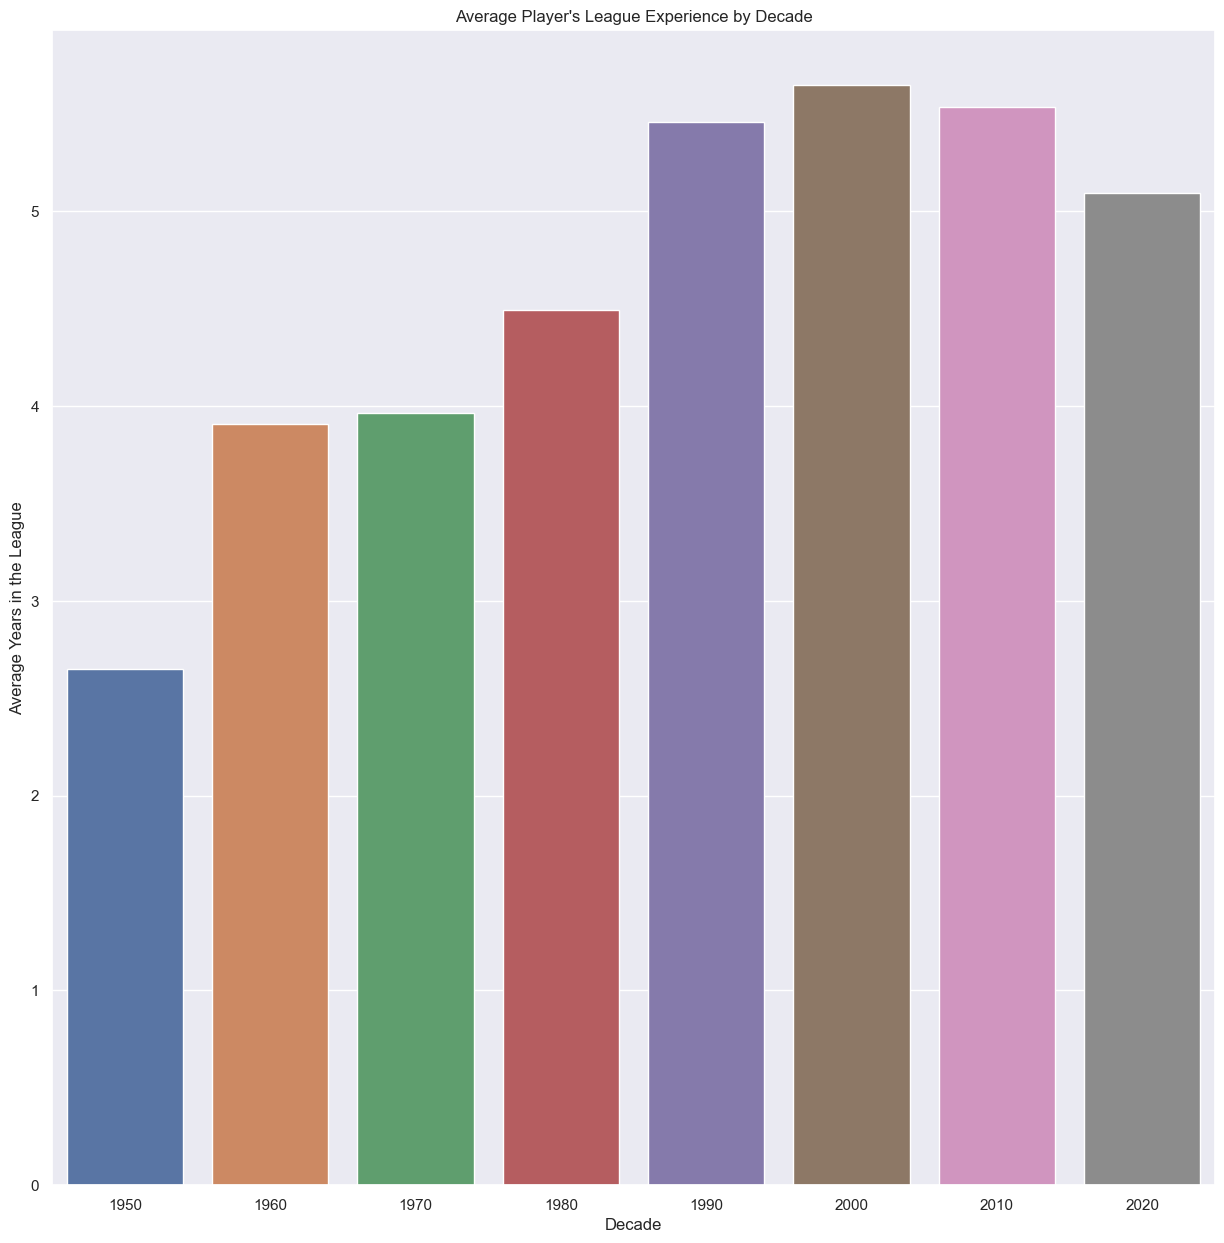

In [293]:
plt.figure(figsize=(15,15))
ax=sns.barplot(x="Decade", y="Year in League",data=average_year_by_decade)

ax.set(xlabel='Decade',
       ylabel='Average Years in the League',
       title='Average Player\'s League Experience by Decade' )

sns.set(font_scale=2)

In [248]:
fg_by_year=data_reg.groupby("Year in League")[["FG Attempts","FG Made","FG %"]].agg(
    {"FG Attempts":"sum", "FG Made":"sum", "FG %":"mean"})

In [249]:
fg_by_year["weighted FG %"] = fg_by_year["FG Made"]/fg_by_year["FG Attempts"]

In [250]:
fg_by_year["FG %"]

Year in League
1     0.406433
2     0.430717
3     0.443131
4     0.451632
5     0.453825
6     0.450515
7     0.451652
8     0.450753
9     0.446933
10    0.446461
11    0.441089
12    0.439609
13    0.435943
14    0.445929
15    0.444290
16    0.427896
17    0.433827
18    0.469149
19    0.458708
20    0.439100
21    0.424600
22    0.352000
Name: FG %, dtype: float64

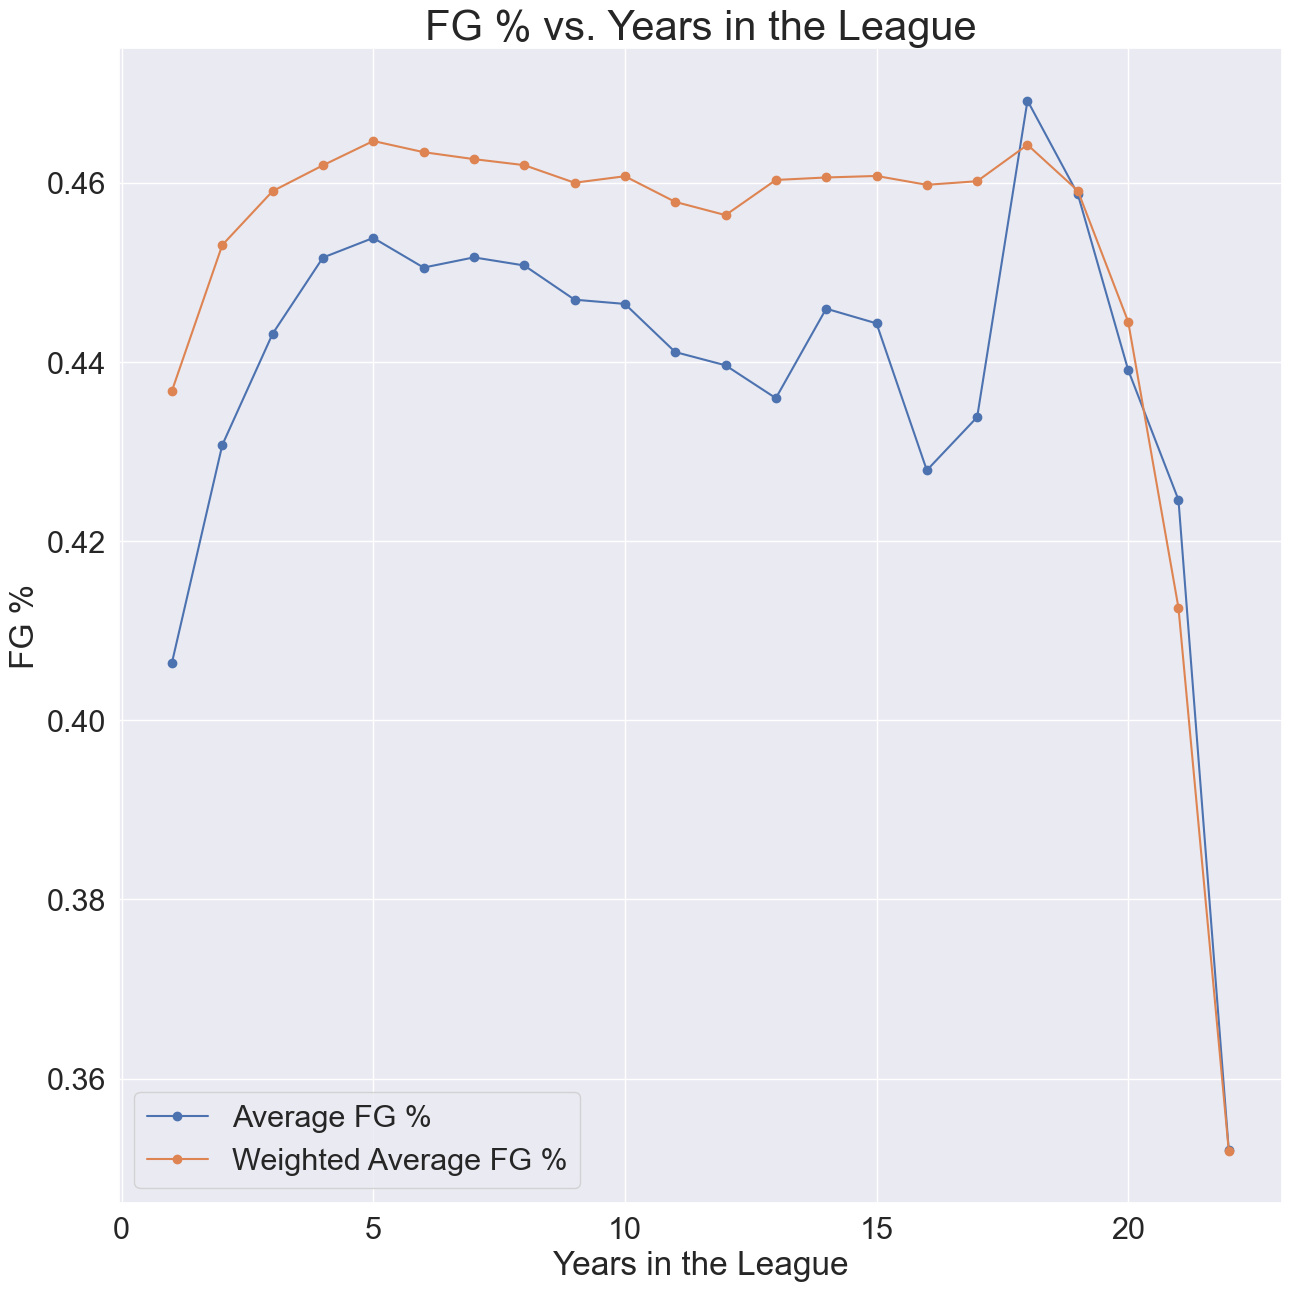

In [294]:
plt.figure(figsize=(15,15))

plt.plot(fg_by_year[["FG %","weighted FG %"]],marker='o')

plt.title('FG % vs. Years in the League', fontsize=30)
plt.xlabel('Years in the League', fontsize=24)
plt.ylabel('FG %', fontsize=24)
plt.legend(["Average FG %","Weighted Average FG %"])


In [281]:
player_list=summarize_by_player.loc[
    (summarize_by_player["max_year"]>=10) & (summarize_by_player["start_year"]>1951), 
    "Player ID"]

In [330]:
data_reg_filter=data_reg[data_reg["Player ID"].isin(player_list)]

In [331]:
fg_by_year2=data_reg_filter.groupby("Year in League")[["FG Attempts","FG Made","FG %"]].agg(
    {"FG Attempts":"sum", "FG Made":"sum", "FG %":"mean"})

In [332]:
fg_by_year2["weighted FG %"] = fg_by_year2["FG Made"]/fg_by_year2["FG Attempts"]

(0.55, 11.0)

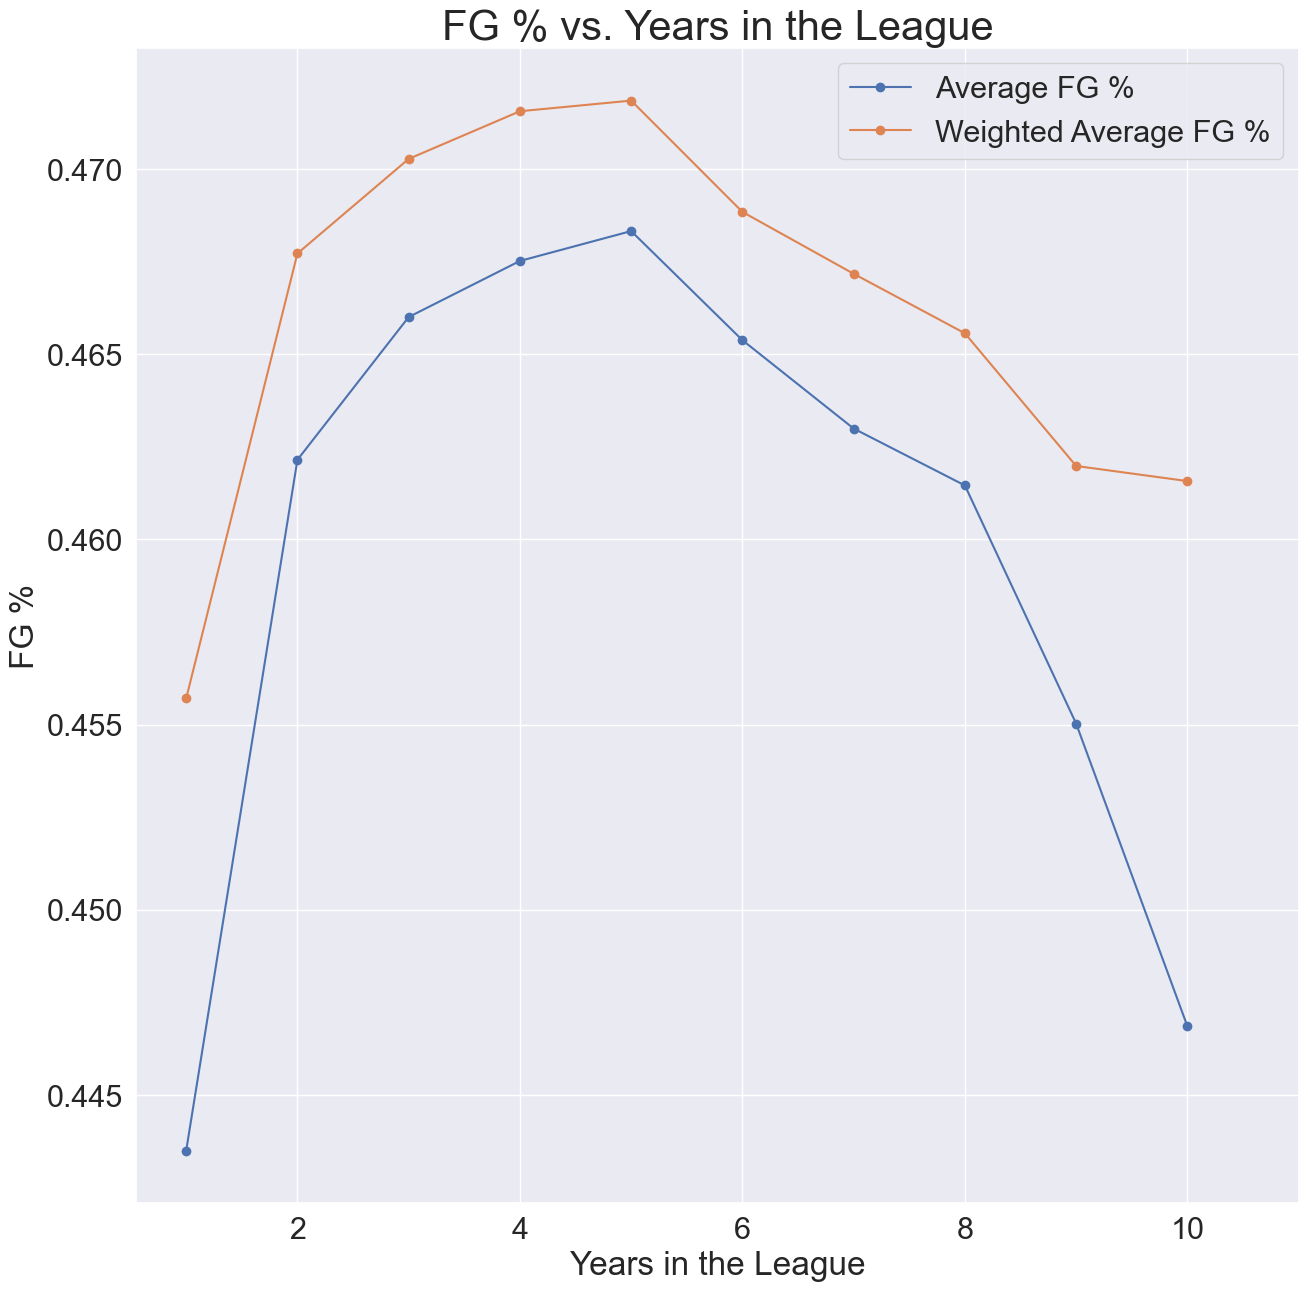

In [334]:
plt.figure(figsize=(15,15))

plt.plot(fg_by_year2.loc[fg_by_year2.index<=10,["FG %","weighted FG %"]],marker='o')

plt.title('FG % vs. Years in the League', fontsize=30)
plt.xlabel('Years in the League', fontsize=24)
plt.ylabel('FG %', fontsize=24)
plt.legend(["Average FG %","Weighted Average FG %"])
plt.xlim(right=11)

In [336]:
fg_by_year_decade=data_reg_filter.groupby(["Year in League","Decade"])[["FG Attempts","FG Made","FG %"]].agg(
    {"FG Attempts":"sum", "FG Made":"sum", "FG %":"mean"})

In [337]:
fg_by_year_decade=fg_by_year_decade.reset_index()

In [338]:
fg_by_year_decade=fg_by_year_decade[fg_by_year_decade["Year in League"]<=15]

In [339]:
fg_by_year_decade=fg_by_year_decade[fg_by_year_decade["Decade"]>=1970]

In [340]:
fg_by_year_decade["weighted FG %"] = fg_by_year_decade["FG Made"]/fg_by_year_decade["FG Attempts"]

<Figure size 1500x1500 with 0 Axes>

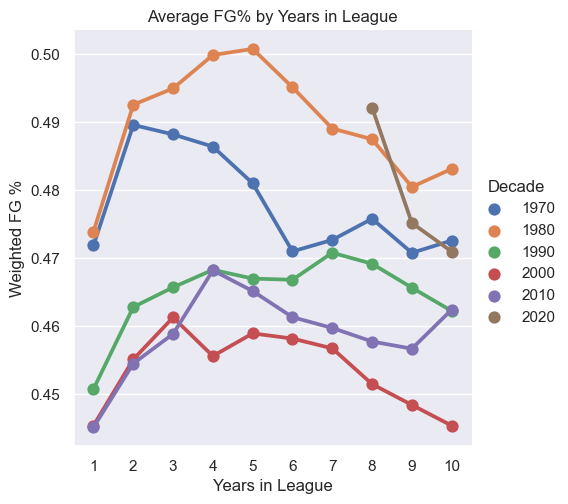

In [357]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1)
ax=sns.catplot(x="Year in League", y="weighted FG %", hue="Decade", 
            data=fg_by_year_decade[fg_by_year_decade["Year in League"]<=10], kind='point')


ax.set(xlabel='Years in League',
       ylabel='Weighted FG %',
       title='Average FG% by Years in League' )

